In [9]:

import pandas as pd
# Load the two datasets
df1 = pd.read_csv('overlappingusers_Dep1922.csv')
df2 = pd.read_csv('overlappingusers_Sui1922.csv')


In [10]:
df1.shape

(84101, 5)

In [11]:
df2.shape

(70742, 7)

In [19]:
# Step 1: Filter the first post of each user in df1
df1['created_utc'] = pd.to_datetime(df1['created_utc'])
df1_first_posts = df1.groupby('author').first().reset_index()

In [20]:
# Step 2: Filter one post of each user in df2 after their first post in df1
df2['created_utc'] = pd.to_datetime(df2['created_utc'])
df2_filtered = pd.merge(df1_first_posts, df2, on='author', suffixes=('_dep', '_sw'), how='inner')
df2_filtered = df2_filtered[df2_filtered['created_utc_sw'] > df2_filtered['created_utc_dep']]

In [21]:
# Step 3: Conduct time to event analysis
df2_filtered['time_to_event'] = (df2_filtered['created_utc_sw'] - df2_filtered['created_utc_dep']).dt.days

In [22]:
# Calculate the survival probabilities
kmf = KaplanMeierFitter()
kmf.fit(df2_filtered['time_to_event'], event_observed=[1] * len(df2_filtered))

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 43215 total observations, 0 right-censored observations>

In [25]:
for p in percentiles:
    events = kmf.event_table
    days_elapsed = events['removed'].cumsum()
    percentiles_day = days_elapsed[days_elapsed >= p * len(df2_filtered)].index[0]
    days.append(percentiles_day)
    print(f"Day when {p * 100}% of events have occurred: {percentiles_day}")


Day when 80.0% of events have occurred: 379
Day when 60.0% of events have occurred: 160
Day when 40.0% of events have occurred: 55


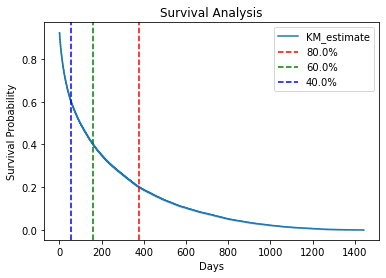

In [29]:

import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
kmf.plot()
plt.axvline(days[0], linestyle='--', color='r', label=f'{percentiles[0] * 100}%')
plt.axvline(days[1], linestyle='--', color='g', label=f'{percentiles[1] * 100}%')
plt.axvline(days[2], linestyle='--', color='b', label=f'{percentiles[2] * 100}%')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.title('Survival Analysis')
plt.legend()
plt.show()

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

def conduct_time_to_event_analysis(df1, df2):
    # Step 1: Filter the first post of each user in df1
    df1['created_utc'] = pd.to_datetime(df1['created_utc'])
    df1_first_posts = df1.groupby('author').first().reset_index()

    # Step 2: Filter one post of each user in df2 after their first post in df1
    df2['created_utc'] = pd.to_datetime(df2['created_utc'])
    df2_filtered = pd.merge(df1_first_posts, df2, on='author', suffixes=('_dep', '_sw'), how='inner')
    df2_filtered = df2_filtered[df2_filtered['created_utc_sw'] > df2_filtered['created_utc_dep']]

    # Step 3: Conduct time to event analysis
    df2_filtered['time_to_event'] = (df2_filtered['created_utc_sw'] - df2_filtered['created_utc_dep']).dt.days

    # Calculate the survival probabilities
    kmf = KaplanMeierFitter()
    kmf.fit(df2_filtered['time_to_event'], event_observed=[1] * len(df2_filtered))

    # Calculate the desired percentiles
    percentiles = [0.8, 0.6, 0.4]
    days = []

    for p in percentiles:
        events = kmf.event_table
        days_elapsed = events['removed'].cumsum()
        percentiles_day = days_elapsed[days_elapsed >= p * len(df2_filtered)].index[0]
        days.append(percentiles_day)
        print(f"Day when {p * 100}% of events have occurred: {percentiles_day}")

    # Plot the survival analysis
    kmf.plot()
    plt.axvline(days[0], linestyle='--', color='r', label=f'{percentiles[0] * 100}%')
    plt.axvline(days[1], linestyle='--', color='g', label=f'{percentiles[1] * 100}%')
    plt.axvline(days[2], linestyle='--', color='b', label=f'{percentiles[2] * 100}%')
    plt.xlabel('Days')
    plt.ylabel('Survival probability')
    plt.title('Survival analysis')
    plt.legend()
    plt.show()



Day when 80.0% of events have occurred: 373
Day when 60.0% of events have occurred: 157
Day when 40.0% of events have occurred: 59


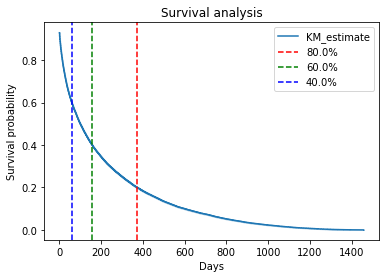

In [45]:
# Conduct time to event analysis
conduct_time_to_event_analysis(df1, df2)

Day when 80.0% of events have occurred: 140
Day when 60.0% of events have occurred: 69
Day when 40.0% of events have occurred: 30


/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


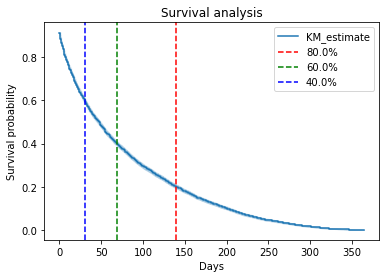

In [46]:
# Filter df1 to include posts from the year 2019
df1_2019 = df1[df1['created_utc'].dt.year == 2019]
df2_2019 = df2[df2['created_utc'].dt.year == 2019]
conduct_time_to_event_analysis(df1_2019, df2_2019)

Day when 80.0% of events have occurred: 137
Day when 60.0% of events have occurred: 65
Day when 40.0% of events have occurred: 26


/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


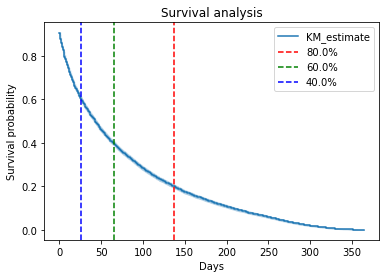

In [47]:
# Filter df1 to include posts from the year 2020
df1_2020 = df1[df1['created_utc'].dt.year == 2020]
df2_2020 = df2[df2['created_utc'].dt.year == 2020]
conduct_time_to_event_analysis(df1_2020, df2_2020)

Day when 80.0% of events have occurred: 132
Day when 60.0% of events have occurred: 67
Day when 40.0% of events have occurred: 29


/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


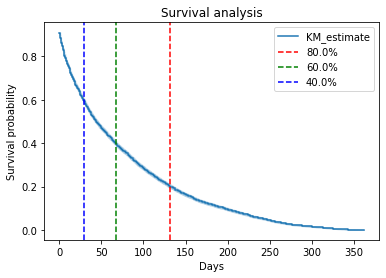

In [48]:
# Filter df1 to include posts from the year 2019
df1_2021 = df1[df1['created_utc'].dt.year == 2021]
df2_2021 = df2[df2['created_utc'].dt.year == 2021]
conduct_time_to_event_analysis(df1_2021, df2_2021)

Day when 80.0% of events have occurred: 142
Day when 60.0% of events have occurred: 68
Day when 40.0% of events have occurred: 29


/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


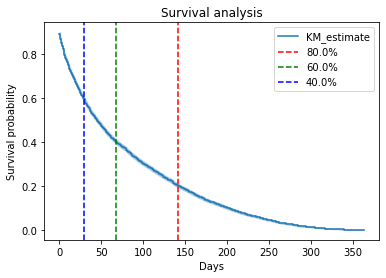

In [49]:
# Filter df1 to include posts from the year 2019
df1_2022 = df1[df1['created_utc'].dt.year == 2022]
df2_2022 = df2[df2['created_utc'].dt.year == 2022]
conduct_time_to_event_analysis(df1_2022, df2_2022)